<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/BAN_6440_PRACTICE_ACTIVITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

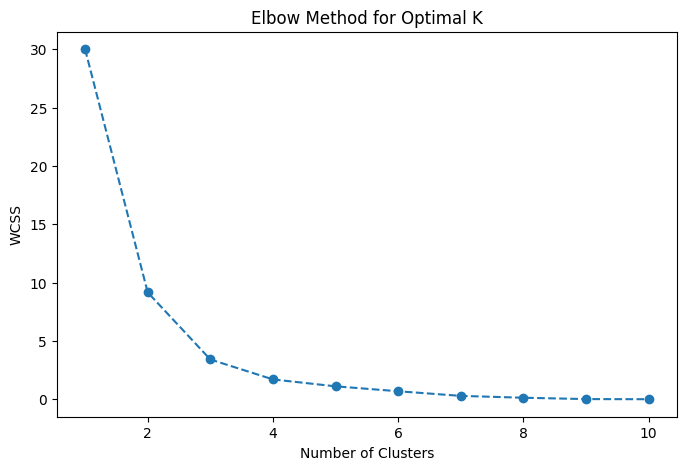

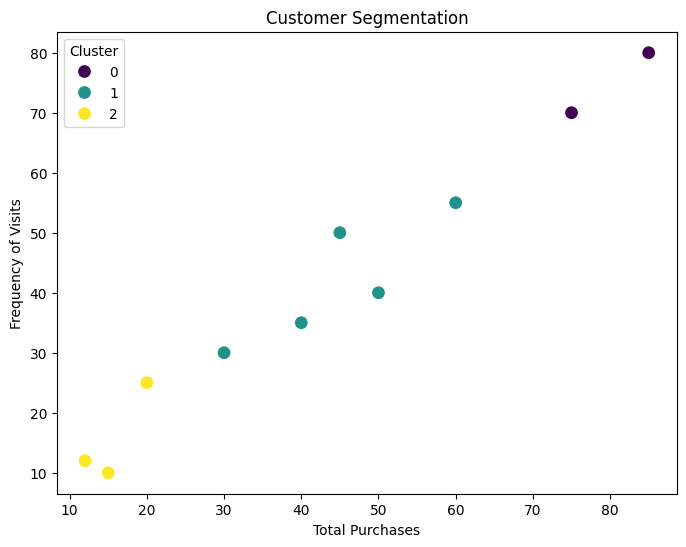

   Customer_ID  Total_Purchases  Avg_Transaction_Value  Frequency_of_Visits  \
0            1               15                      5                   10   
1            2               45                     20                   50   
2            3               30                     15                   30   
3            4               85                     25                   80   
4            5               12                      5                   12   
5            6               60                     22                   55   
6            7               50                     18                   40   
7            8               20                     10                   25   
8            9               75                     30                   70   
9           10               40                     15                   35   

   Cluster  
0        2  
1        1  
2        1  
3        0  
4        2  
5        1  
6        1  
7        2  
8        0  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample Data: Customer purchase behavior
data = {
    "Customer_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Total_Purchases": [15, 45, 30, 85, 12, 60, 50, 20, 75, 40],
    "Avg_Transaction_Value": [5, 20, 15, 25, 5, 22, 18, 10, 30, 15],
    "Frequency_of_Visits": [10, 50, 30, 80, 12, 55, 40, 25, 70, 35]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Selecting Features
X = df.drop(columns=["Customer_ID"])

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Applying K-Means Clustering
optimal_k = 3  # Assume elbow method suggests 3 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualizing Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Total_Purchases"], y=df["Frequency_of_Visits"], hue=df["Cluster"], palette="viridis", s=100)
plt.xlabel("Total Purchases")
plt.ylabel("Frequency of Visits")
plt.title("Customer Segmentation")
plt.legend(title="Cluster")
plt.show()

# Display segmented customer data
print(df)
